In [109]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sdv.tabular import GaussianCopula

In [110]:
ds1=pd.read_csv('ElectricCarData_Norm.csv')
ds2=pd.read_csv('EVIndia.csv')
ds3=pd.read_csv('RS_Session_254_AU_2384.C.i.csv')
ds4=pd.read_csv('RS_Session_254_AU_697_1.csv')
ds5=pd.read_csv('RS_Session_255_AU_2349_1.csv')

In [111]:
ds6=pd.read_csv('archive/Indian automoble buying behavour study 1.0.csv')

In [112]:
ds6.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


### Synthetic Data Generation

In [113]:
synthetic_data_generator_model = GaussianCopula()
synthetic_data_generator_model.fit(ds6)

In [114]:
sample = synthetic_data_generator_model.sample(1000)

In [115]:
ds7=ds6.append(sample)
ds7.reset_index(inplace=True)

### Explanatory Data Analysis

In [117]:
ds7.isnull().any()

index               False
Age                 False
Profession          False
Marrital Status     False
Education           False
No of Dependents    False
Personal loan       False
House Loan          False
Wife Working        False
Salary              False
Wife Salary         False
Total Salary        False
Make                False
Price               False
dtype: bool

In [118]:
AgeGroup={}
length=ds7.shape[0]
AgeGroup['25-30']=round(ds7[(ds7['Age']>=25)&(ds7['Age']<30)].shape[0]*100/length,2)
AgeGroup['30-35']=round(ds7[(ds7['Age']>=30)&(ds7['Age']<35)].shape[0]*100/length,2)
AgeGroup['35-40']=round(ds7[(ds7['Age']>=35)&(ds7['Age']<40)].shape[0]*100/length,2)
AgeGroup['40-45']=round(ds7[(ds7['Age']>=40)&(ds7['Age']<45)].shape[0]*100/length,2)
AgeGroup['45-50']=round(ds7[(ds7['Age']>=45)&(ds7['Age']<50)].shape[0]*100/length,2)
AgeGroup['50-55']=round(ds7[(ds7['Age']>=50)&(ds7['Age']<55)].shape[0]*100/length,2)
AgeGroup['55+']=round(ds7[ds7['Age']>=55].shape[0]/length,2)

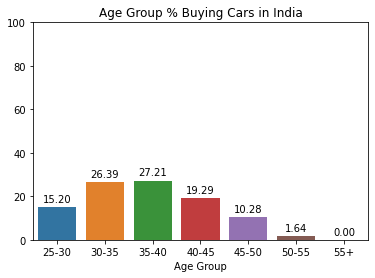

In [119]:
fig,ax=plt.subplots()
plots=sb.barplot(x=list(AgeGroup.keys()),y=list(AgeGroup.values()))
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
ax.set_ylim(0,100)
plt.title('Age Group % Buying Cars in India')
plt.xlabel('Age Group')
plt.show()

In [10]:
ds7['Car Type']='NA'

In [120]:
idx=ds7[(ds7['Make']=='i20') | (ds7['Make']=='Baleno')].index
ds7.loc[idx,'Car Type']='Hatchback'
idx=ds7[(ds7['Make']=='Ciaz') | (ds7['Make']=='City') | (ds7['Make']=='Verna')].index
ds7.loc[idx,'Car Type']='Sedan'
idx=ds7[(ds7['Make']=='SUV') | (ds7['Make']=='Duster') | (ds7['Make']=='Creata')].index
ds7.loc[idx,'Car Type']='SUV'
idx=ds7[(ds7['Make']=='Luxuray')].index
ds7.loc[idx,'Car Type']='Luxuray'

In [127]:
car_make_groupby=ds7[(ds7['Marrital Status']=='Married') & (ds7['No of Dependents']>=3)].groupby(['Make'])['Make'].count()

In [128]:
car_type_groupby=ds7[(ds7['Marrital Status']=='Married') & (ds7['No of Dependents']>=3)].groupby(['Car Type'])['Car Type'].count()

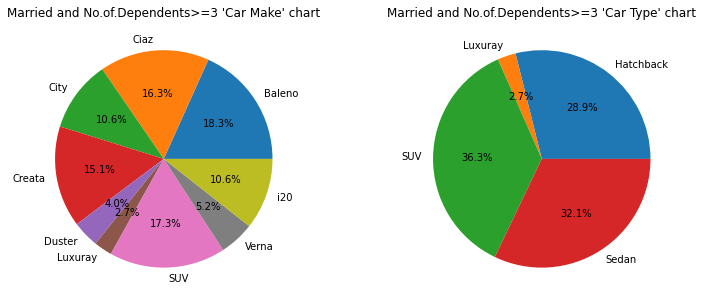

In [137]:
fig, axes = plt.subplots(1,2,figsize=(7,5))
axes[0].pie(list(car_make_groupby),labels=list(car_make_groupby.keys()),autopct='%.1f%%')
axes[0].set_title('Married and No.of.Dependents>=3 \'Car Make\' chart')
axes[1].pie(list(car_type_groupby),labels=list(car_type_groupby.keys()),autopct='%.1f%%')
axes[1].set_title('Married and No.of.Dependents>=3 \'Car Type\' chart')
plt.subplots_adjust(right=1.5)
plt.show()

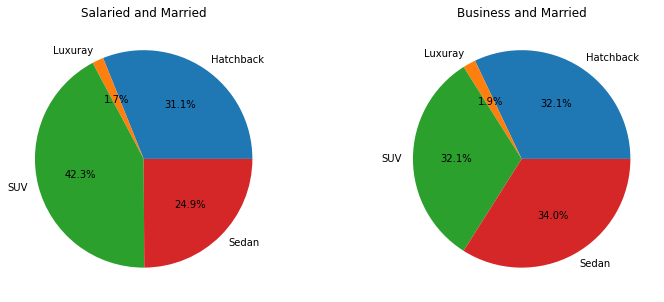

In [141]:
#salaried and Married vs Business and Married People Car Buying Behaviour
fig, axes = plt.subplots(1,2,figsize=(7,5))
plt.title('salaried and Married vs Business and Married Behaviour')
sm=ds7[(ds7['Profession']=='Salaried') & (ds7['Marrital Status']=='Married')].groupby(['Car Type'])['Car Type'].count()
bm=ds7[(ds7['Profession']=='Business') & (ds7['Marrital Status']=='Married')].groupby(['Car Type'])['Car Type'].count()
axes[0].pie(list(sm),labels=list(sm.keys()),autopct='%.1f%%')
axes[0].set_title('Salaried and Married')
axes[1].pie(list(bm),labels=list(bm.keys()),autopct='%.1f%%')
axes[1].set_title('Business and Married')
plt.subplots_adjust(right=1.5)
plt.show()

In [ ]:
ds7['Financial Status']='NA'

In [149]:
ds7['Salary'].describe()

count    1.099000e+03
mean     1.751137e+06
std      6.420355e+05
min      2.000000e+05
25%      1.300000e+06
50%      1.800000e+06
75%      2.200000e+06
max      3.800000e+06
Name: Salary, dtype: float64

In [161]:
ds7[(ds7['Salary']+ds7['Wife Salary'])<500000]

,index,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,Car Type,Financial Condition
46,46,36,Business,Married,Graduate,4,No,No,No,200000,0,200000,Ciaz,1100000,Sedan,Low
162,63,33,Business,Single,Post Graduate,1,Yes,No,m,200000,0,200000,Verna,170000,Sedan,Low
355,256,26,Business,Single,Graduate,0,No,No,m,200000,0,200000,Baleno,250000,Hatchback,Low
592,493,27,Business,Single,Graduate,2,Yes,Yes,m,200000,100000,200000,Verna,750000,Sedan,Low
673,574,27,Business,Married,Graduate,1,No,No,m,200000,200000,200000,City,770000,Sedan,Middle


In [162]:
#Salary
ds7.loc[ds7[(ds7['Salary']+ds7['Wife Salary'])<500000].index,'Financial Condition']='Low'
ds7.loc[ds7[((ds7['Salary']+ds7['Wife Salary'])>=500000) & ((ds7['Salary']+ds7['Wife Salary'])<=1800000)].index,'Financial Condition']='Middle'
ds7.loc[ds7[((ds7['Salary']+ds7['Wife Salary'])>1800000)].index,'Financial Condition']='High'

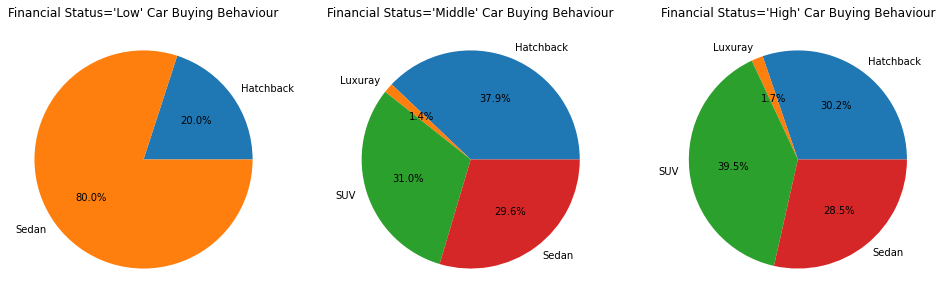

In [163]:
fig, axes = plt.subplots(1,3,figsize=(5,6))
fl=ds7[ds7['Financial Condition']=='Low'].groupby('Car Type')['Car Type'].count()
fm=ds7[ds7['Financial Condition']=='Middle'].groupby('Car Type')['Car Type'].count()
fh=ds7[ds7['Financial Condition']=='High'].groupby('Car Type')['Car Type'].count()
axes[0].pie(list(fl),labels=list(fl.keys()),autopct='%.1f%%')
axes[0].set_title('Financial Status=\'Low\' Car Buying Behaviour')
axes[1].pie(list(fm),labels=list(fm.keys()),autopct='%.1f%%')
axes[1].set_title('Financial Status=\'Middle\' Car Buying Behaviour')
axes[2].pie(list(fh),labels=list(fh.keys()),autopct='%.1f%%')
axes[2].set_title('Financial Status=\'High\' Car Buying Behaviour')
plt.subplots_adjust(right=2.7)
plt.show()

In [158]:
ds7.head()

,index,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,Car Type,Financial Condition
0,0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000,Hatchback,Middle
1,1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000,Sedan,Middle
2,2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000,SUV,Middle
3,3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000,Sedan,Middle
4,4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000,SUV,Middle
